## Explore data

To train a regression model, you need a dataset that includes historical features, characteristics of the entity for which you want to make a prediction. [Bir regresyon modelini eğitmek için, geçmiş özelliklerini, kendisi hakkında tahminde bulunmak istediğiniz varlığın özelliklerini içeren bir veri kümesine ihtiyacınız vardır.] You also need known label values, the numeric value that you want to train a model to predict. [Ayrıca, bir modeli tahmin etmesi için eğitmek istediğiniz sayısal değer olan bilinen etiket değerlerine de ihtiyacınız vardır.]

### Create a pipeline

To use the Azure Machine Learning designer, you create a pipeline that you use to train a machine learning model. [Azure Machine Learning tasarımcısını kullanmak için bir makine öğrenimi modelini eğitmek için kullandığınız bir işlem hattı oluşturursunuz.] This pipeline starts with the dataset from which you want to train the model. [Bu işlem hattı, modeli eğitmek istediğiniz veri kümesiyle başlar.]

1. In Azure Machine Learning studio, view the **Designer** page (under **Author**), and select + to create a new pipeline. [Azure Machine Learning stüdyosunda Tasarımcı sayfasını görüntüleyin (Yazar altında) ve yeni bir işlem hattı oluşturmak için + öğesini seçin.]

2. At the top left-hand side of the screen, click on the default pipeline name (**Pipeline-Created-on-date**) and change it to **Auto Price Training**. [Ekranın sol üst tarafında, varsayılan boru hattı adına (Tarihte Boru Hattı Oluşturuldu) tıklayın ve bunu Otomatik Fiyat Eğitimi olarak değiştirin.]

3. You must specify a compute target on which to run the pipeline. [İşlem hattının çalıştırılacağı bir işlem hedefi belirtmelisiniz.] In the **Settings** pane, click on **Select compute target** to select the compute cluster you created previously (if the **Settings** pane is not visible, select the **⚙** icon next to the pipeline name at the top). [Ayarlar bölmesinde, daha önce oluşturduğunuz işlem kümesini seçmek için İşlem hedefini seç'e tıklayın (Ayarlar bölmesi görünmüyorsa, üst taraftaki işlem hattı adının yanındaki ⚙ simgesini seçin).]

### Add and explore a dataset

In this module, you train a regression model that predicts the price of an automobile based on its characteristics. [Bu modülde, özelliklerine göre bir otomobilin fiyatını tahmin eden bir regresyon modeli eğitiyorsunuz.] Azure Machine Learning includes a sample dataset that you can use for this model. [Azure Machine Learning, bu model için kullanabi [Bu sütunların tümü farklı ölçeklerde ölçülür ve daha büyük tepe-rpm değerlerinin eğitim algoritmasını saptırması ve vuruş gibi daha düşük değerlere sahip sütunlara kıyasla bu sütunda aşırı bağımlılık yaratması mümkündür.] leceğiniz örnek bir veri kümesi içerir.]

1. Next to the pipeline name on the left, select the button >> to expand the panel. [Paneli genişletmek için soldaki işlem hattı adının yanındaki >> düğmesini seçin.] Find the **Sample datasets** section, and drag the **Automobile price data (Raw)** dataset from the **Samples** section onto the canvas. [Örnek veri kümeleri bölümünü bulun ve Örnekler bölümünden Otomobil fiyat verisi (Ham) veri kümesini tuvale sürükleyin.]

2. Right-clic [en] k (Ctrl+click on a Mac) the Automobile price data (Raw) dataset on the canvas, and on the Outputs menu, click Dataset output on the Preview data graph icon. [Tuvalde Otomobil fiyat verisi (Raw) veri kümesine sağ tıklayın (Mac'te Ctrl+tıklayın) ve Çıktılar menüsünde Veri grafiği ön izleme simgesinde Veri kümesi çıktısı'na tıklayın.]

3. Review the schema of the data. [Verilerin şemasını gözden geçirin.] Note that you can see the distributions of the various columns as histograms. [Çeşitli sütunların dağılımlarını histogramlar olarak görebileceğinizi unutmayın.]

4. Scroll to the right of the dataset until you see the **Price** column, which is the label that your model predicts. [Modelinizin öngördüğü etiket olan Fiyat sütununu görene kadar veri kümesinin sağına gidin.]

5. Select the column header for the **price** column and view the details that are displayed in the pane to the right. [Fiyat sütunu için sütun başlığını seçin ve sağdaki bölmede görüntülenen ayrıntıları görüntüleyin.] These include various statistics for the column values, and a histogram with the distribution of the column values. [Bunlar, sütun değerleri için çeşitli istatistikleri ve sütun değerlerinin dağılımını içeren bir histogramı içerir.]

6. Scroll back to the left and select the **normalized-losses** column header. [Sola geri kaydırın ve normalleştirilmiş kayıplar sütun başlığını seçin.] Then review the statistics for this column. [Ardından bu sütun için istatistikleri inceleyin.] Note there are quite a few missing values in this column. [Bu sütunda epeyce eksik değer olduğunu unutmayın.] Missing values limit the column's usefulness for predicting the **price** label so you might want to exclude it from training. [Eksik değerler, sütunun fiyat etiketini tahmin etme kullanışlılığını sınırlar; bu nedenle, onu eğitimden hariç tutmak isteyebilirsiniz.]

7. View the statistics for the **bore**, **stroke**, and **horsepower** columns. [Delik, strok ve beygir gücü sütunları için istatistikleri görüntüleyin.] Note the number of missing values. [Eksik değerlerin sayısını not edin.] These columns have fewer missing values than **normalized-losses**, so they might still be useful in predicting **price** once you exclude the rows where the values are missing from training. [Bu sütunlar, normalleştirilmiş kayıplardan daha az eksik değere sahiptir, bu nedenle, değerlerin eksik olduğu satırları eğitimden çıkardığınızda fiyatı tahmin etmede yine de yararlı olabilirler.]

8. Compare the values in the **stroke, peak-rpm, and city-mpg** columns. [Strok, tepe-rpm ve şehir-mpg sütunlarındaki değerleri karşılaştırın.] These columns are all measured in different scales, and it is possible that the larger values for **peak-rpm** might bias the training algorithm and create an over-dependency on this column compared to columns with lower values, such as **stroke**. Typically, data scientists mitigate this possible bias by normalizing the numeric columns so they're on the similar scales.

9. Close the **Automobile price data (Raw) result visualization** window so that you can see the dataset on the canvas like this:

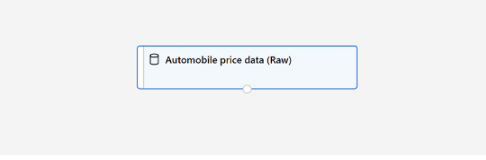

### Add data transformations

You typically apply data transformations to prepare the data for modeling. [Verileri modellemeye hazırlamak için genellikle veri dönüştürmeleri uygularsınız.] In the case of the automobile price data, you add transformations to address the issues you identified when you explored the data. [Otomobil fiyat verileri söz konusu olduğunda, verileri incelerken belirlediğiniz sorunları gidermek için dönüşümler eklersiniz.]

1. In the pane on the left, expand the **Data Transformation** section, which contains a wide range of modules you can use to transform data before model training. [Soldaki bölmede, model eğitiminden önce verileri dönüştürmek için kullanabileceğiniz çok çeşitli modüller içeren Veri Dönüşümü bölümünü genişletin.]

2. Drag a **Select Columns in Dataset** module to the canvas, below the **Automobile price data (Raw)** module. [Otomobil fiyat verileri (Ham) modülünün altındaki tuvale Veri Kümesi modülünde bir Sütun Seç'i sürükleyin.] Then connect the output at the bottom of the **Automobile price data (Raw)** module to the input at the top of the **Select Columns in Dataset** module, like this: [Ardından, Otomobil fiyat verisi (Ham) modülünün altındaki çıkışı, Veri Kümesi'nde Sütunları Seçin üst kısmındaki girişe şu şekilde bağlayın:]

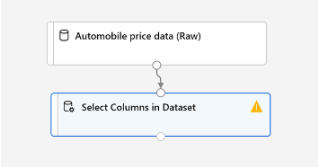

3. Select the **Select Columns in Dataset** module, and in its **Settings** pane on the right, select **Edit column**. [Veri Kümesi modülünde Sütunları Seç'i seçin ve sağdaki Ayarlar bölmesinde Sütunu düzenle'yi seçin.] Then in the **Select columns** window, select **By name** and use the + links to add all columns other than **normalized-losses**, like this: [Ardından, Sütun seç penceresinde Ada göre'yi seçin ve normalleştirilmiş kayıplar dışındaki tüm sütunları eklemek için + bağlantılarını kullanın, örneğin:]

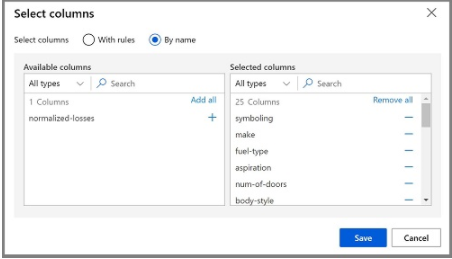

In the rest of this exercise, you go through steps to create a pipeline that looks like this:

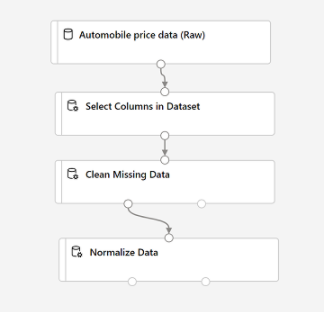

Follow the remaining steps, use the image for reference as you add and configure the required modules. [Kalan adımları izleyin, gerekli modülleri eklerken ve yapılandırırken görüntüyü referans olarak kullanın.]

4. Drag a **Clean Missing Data** module from the **Data Transformations** section, and place it under the **Select Columns in Dataset** module. [Veri Dönüşümleri bölümünden Eksik Verileri Temizle modülünü sürükleyin ve Veri Kümesi'nde Sütunları Seçin altına yerleştirin.] Then connect the output from the **Select Columns in Dataset** module to the input of the **Clean Missing Data** module. [Ardından, Select Columns in Dataset modülünden gelen çıkışı Eksik Verileri Temizle modülünün girişine bağlayın.]

5. Select the **Clean Missing Data** module, and in the settings pane on the right, click **Edit column**. [Eksik Verileri Temizle modülünü seçin ve sağdaki ayarlar bölmesinde Sütunu düzenle'ye tıklayın.] Then in the **Select columns** window, select **With rules**, in the **Include** list select **Column names**, in the box of column names enter **bore, stroke, and horsepower** like this: [Ardından, Sütun seç penceresinde Kurallarla'yı seçin, Dahil et listesinde Sütun adları'nı seçin, sütun adları kutusuna delik, strok ve beygir gücünü şu şekilde girin:]

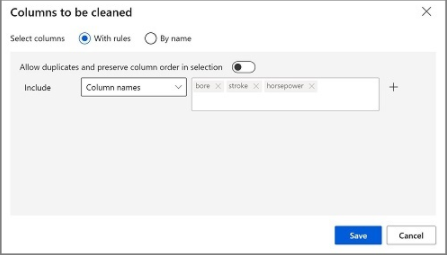

6. With the **Clean Missing Data** module still selected, in the settings pane, set the following configuration settings:

- **Minimum missing value ratio**: 0.0

- **Maximum missing value ratio**: 1.0

- **Cleaning mode**: Remove entire row

7. Drag a **Normalize Data** module to the canvas, below the **Clean Missing Data** module. Then connect the left-most output from the **Clean Missing Data** module to the input of the **Normalize Data** module.

8. Select the **Normalize Data** module and view its settings. Note that it requires you to specify the transformation method and the columns to be transformed. Then, set the transformation to **MinMax**. Apply a rule to edit the columns to include the following **Column names**:

- **symboling**

- **wheel-base**

- **length**

- **width**

- **height**

- **curb-weight**

- **engine-size**

- **bore**

- **stroke**

- **compression-ratio**

- **horsepower**

- **peak-rpm**

- **city-mpg**

- **highway-mpg**

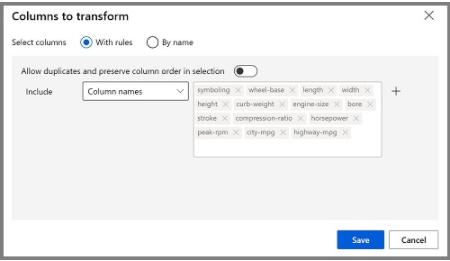

### Run the pipeline

To apply your data transformations, you must run the pipeline as an experiment.

1. Ensure that your pipeline looks similar to this image:

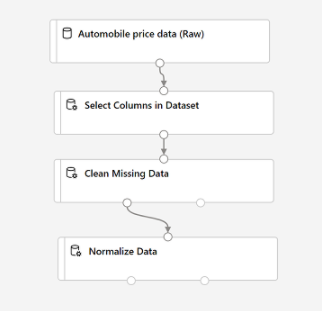

2. Select **Submit**, and run the pipeline as a new experiment named **mslearn-auto-training** on your compute cluster.

3. Wait for the run to finish, which might take 5 minutes or more. When the run has completed, the modules should look like this:

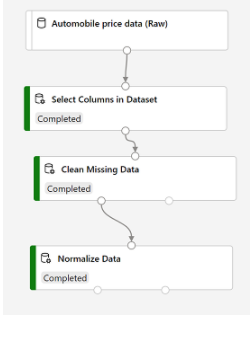

### View the transformed data

The dataset is now prepared for model training.

Select the completed **Normalize Data** module, and in its **Settings** pane on the right, on the **Outputs + logs** tab, select the Preview data icon for the Transformed dataset.

View the data. Note that the **normalized-losses** column has been removed, all rows contain data for ***bore, stroke, and horsepower**, and the numeric columns you selected have been normalized to a common scale.

Close the normalized data result visualization.